In [14]:
import numpy as np
import matplotlib.pyplot as plt


### Generate Data



In [5]:
x = np.random.uniform(0, 1, (100, 2))

In [10]:
crosses = x[(x[:, 0] * 3 - x[:, 1] * 2 + 0.1) > 0.5]
circles = x[(x[:, 0] * 3 - x[:, 1] * 2 + 0.1) <= 0.5]

In [11]:
crosses.shape

(54, 2)

In [12]:
circles.shape

(46, 2)

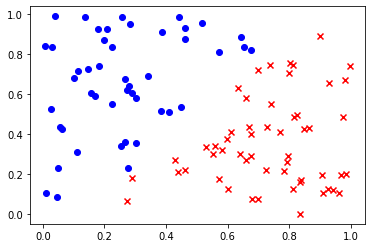

In [17]:
plt.scatter(crosses[:, 0], crosses[:, 1], marker='x', c='r')
plt.scatter(circles[:, 0], circles[:, 1], marker='o', c='b')

### Calculate nearest neighbours

In [38]:
k = 5
test = [0.35, 0.3]
distances = []

for i, p in enumerate(x):
    dist = (p[0] - test[0])**2 + (p[1] - test[1])**2
    distances.append((i, dist))

distances = sorted(distances, key=lambda x: x[1])
nn = [d[0] for d in distances][0:k]

In [39]:
nn

[91, 53, 44, 78, 49]

### Predict 

In [40]:
crosses_count = 0
circles_count = 0

for i in nn:
    d = x[i]
    is_cross = (d[0] * 3 - d[1] * 2 + 0.1) > 0.5
    if is_cross:
        crosses_count += 1
    else:
        circles_count += 1

if crosses_count > circles_count:
    marker = 'x'
else:
    marker = 'o'


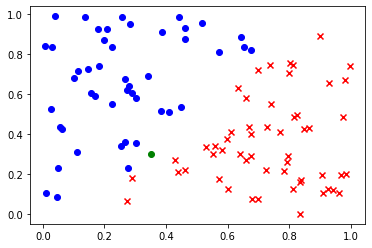

In [41]:
plt.scatter(test[0], test[1], marker=marker, c='g')
plt.scatter(crosses[:, 0], crosses[:, 1], marker='x', c='r')
plt.scatter(circles[:, 0], circles[:, 1], marker='o', c='b')